Initial shape: (8523, 12)

Missing values:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 



C:\Users\bavya\AppData\Local\Temp\ipykernel_15096\995753370.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
C:\Users\bavya\AppData\Local\Temp\ipykernel_15096\995753370.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


Hyperparameter Tuning...

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 9
[LightGBM] [Info] Start training from score 2202.365232

Training Linear Regression...
  RMSE: 1136.71, R²: 0.5246

Training Polynomial Regression...
  RMSE: 1317.30, R²: 0.3616

Training Lasso Regression...
  RMSE: 1136.61, R²: 0.5247

Training Decision Tree...
  RMSE: 1129.46, R²: 0.5307

Training Random Forest...
  RMSE: 1033.28, R²: 0.6072

Training Gradient Boosting...
  RMSE: 1028.69, R²: 0.6107

Training SVR...
  RMSE: 1214.02, R²: 0.4577

Training MLP Regressor...
  RMSE: 1027.88, R²: 0.6113

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 s

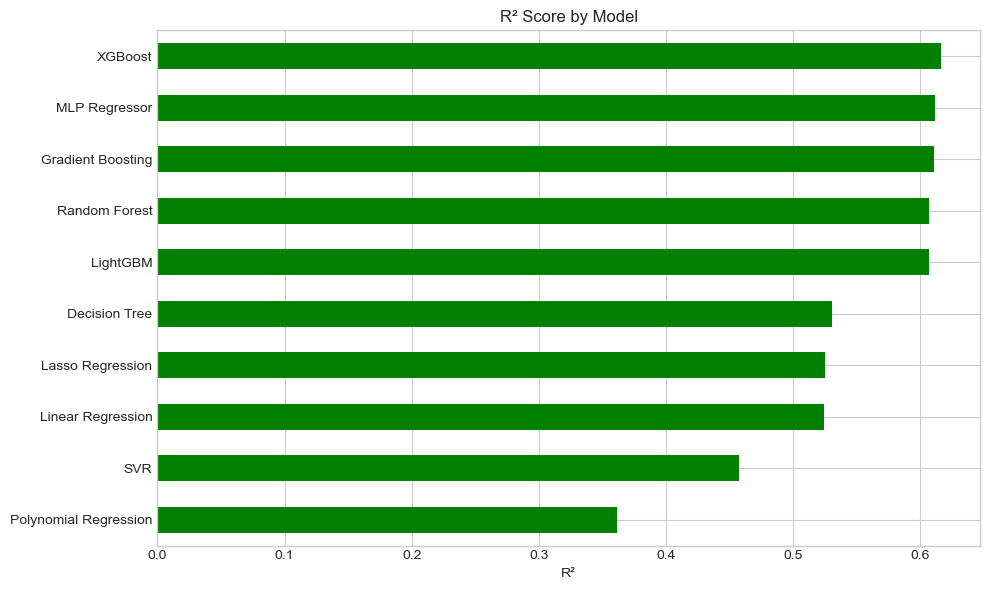

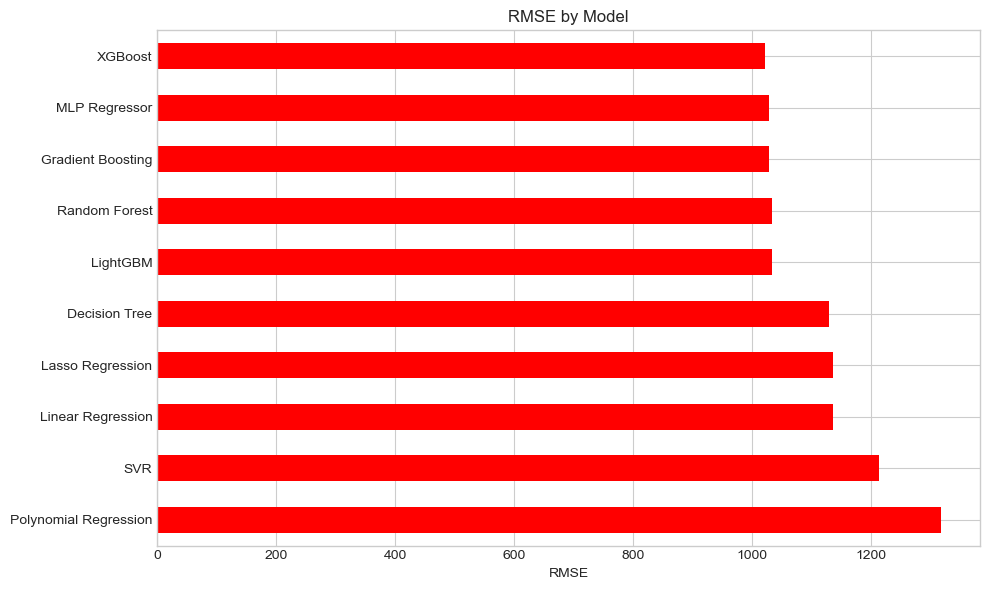

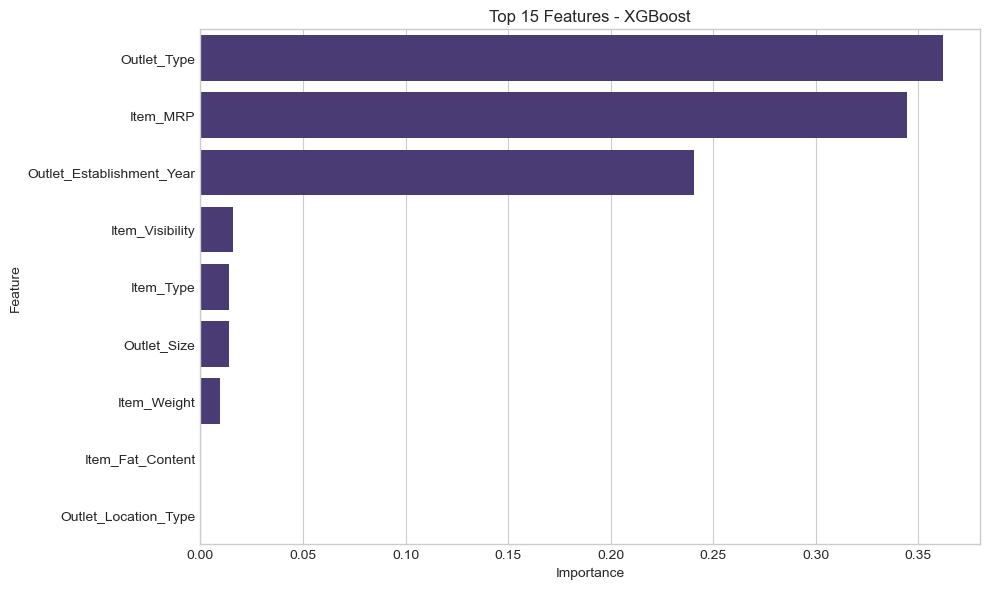


Plotting Distributions...



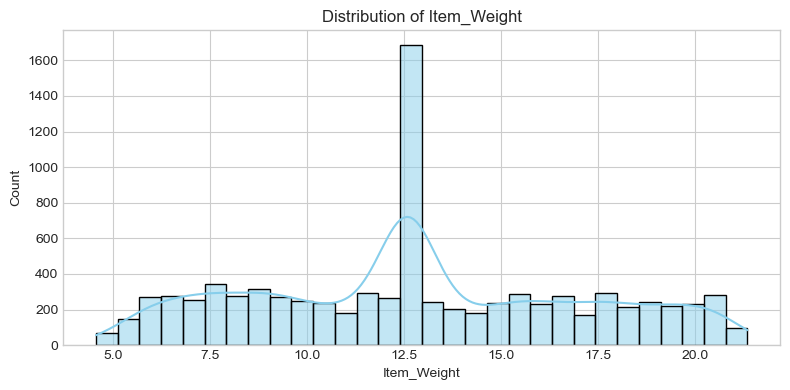

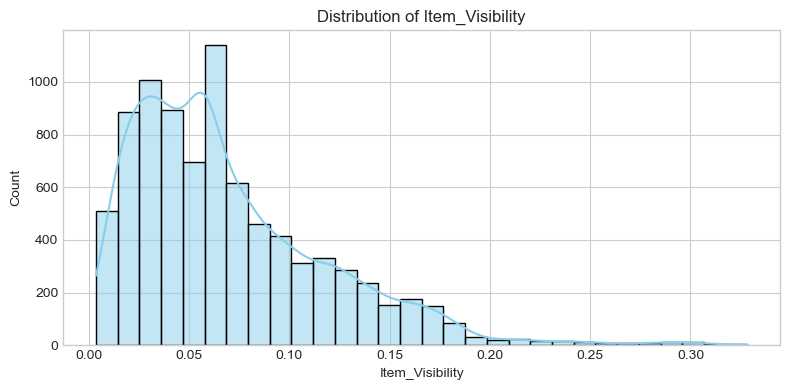

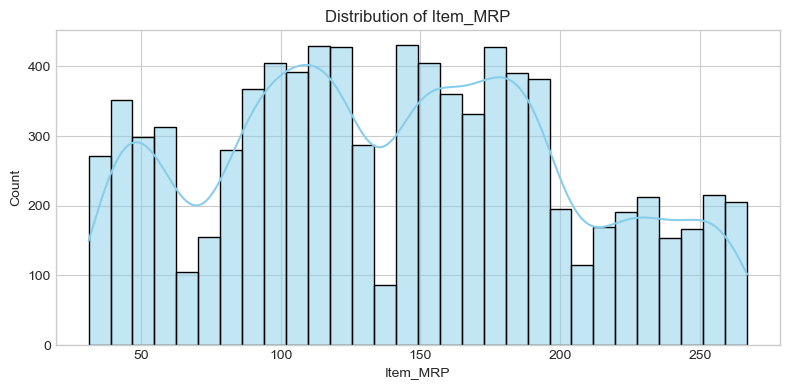

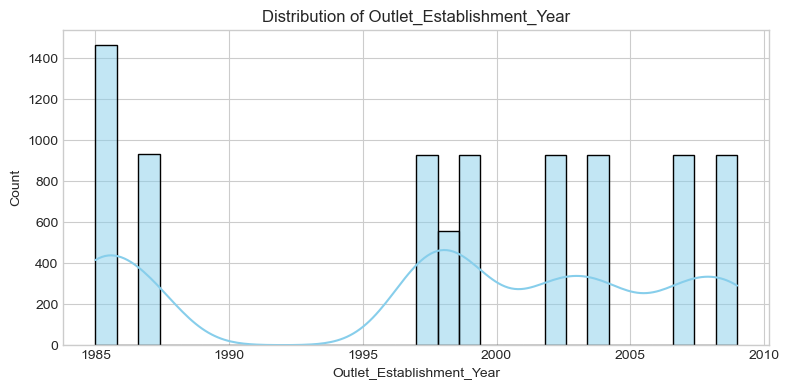

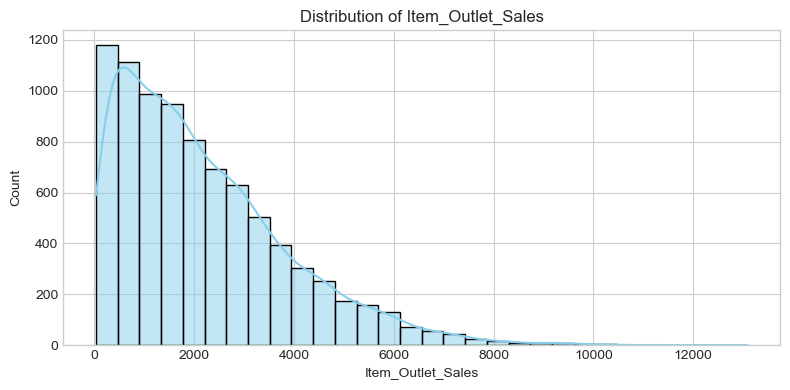

C:\Users\bavya\AppData\Local\Temp\ipykernel_15096\995753370.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_encoders[col].inverse_transform(df[col]), palette='Set2')


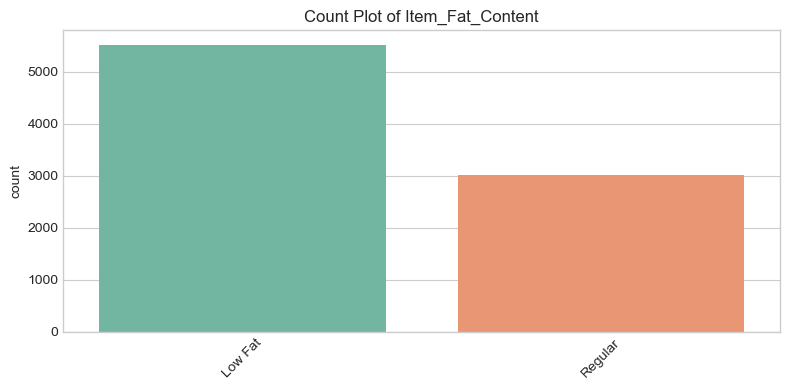

C:\Users\bavya\AppData\Local\Temp\ipykernel_15096\995753370.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_encoders[col].inverse_transform(df[col]), palette='Set2')


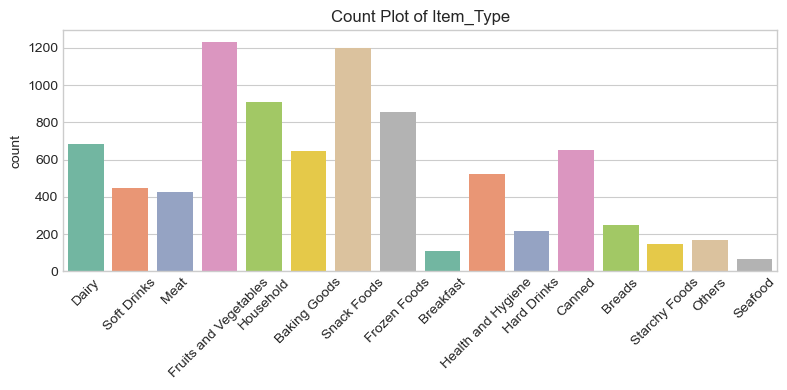

C:\Users\bavya\AppData\Local\Temp\ipykernel_15096\995753370.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_encoders[col].inverse_transform(df[col]), palette='Set2')


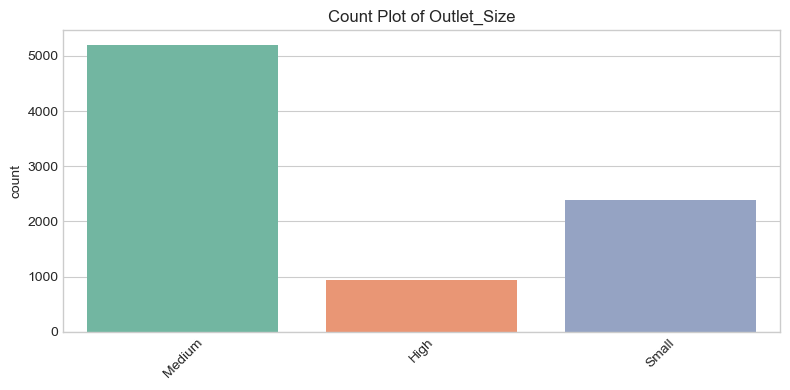

C:\Users\bavya\AppData\Local\Temp\ipykernel_15096\995753370.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_encoders[col].inverse_transform(df[col]), palette='Set2')


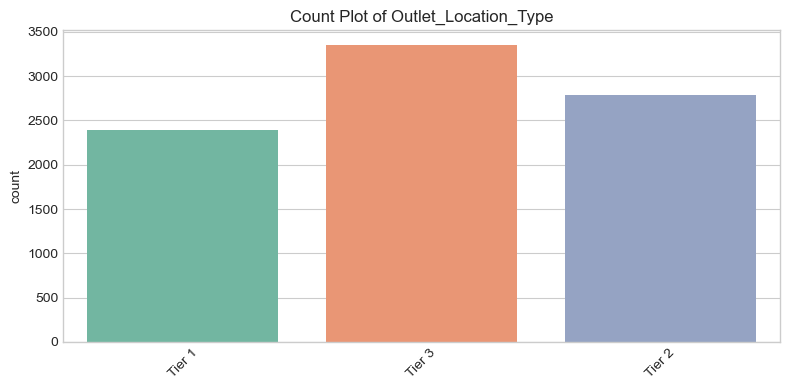

C:\Users\bavya\AppData\Local\Temp\ipykernel_15096\995753370.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_encoders[col].inverse_transform(df[col]), palette='Set2')


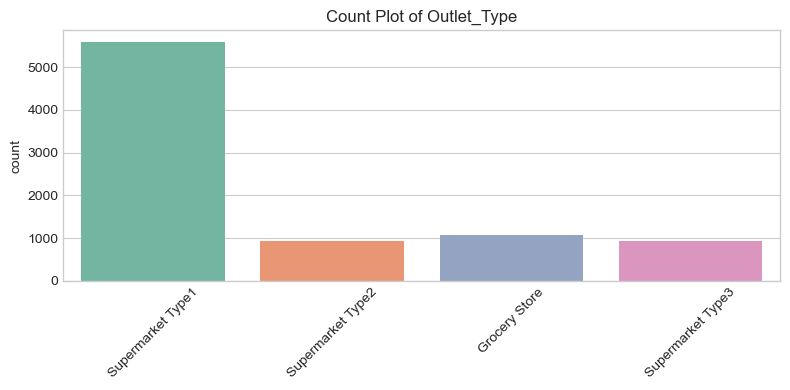


 Analysis Complete!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional libraries with error handling
try:
    import lightgbm as lgb
    lightgbm_available = True
except ImportError:
    print("LightGBM not installed. Skipping this model.")
    lightgbm_available = False

try:
    import xgboost as xgb
    xgboost_available = True
except ImportError:
    print("XGBoost not installed. Skipping this model.")
    xgboost_available = False

# ================== SETUP ==================
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# ================== DATA LOADING ==================

df = pd.read_csv(r"E:\bigmart11\train.csv")
print(f"Initial shape: {df.shape}\n")

# ================== DATA CLEANING ==================
print("Missing values:\n", df.isnull().sum(), "\n")

df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

df['Item_Visibility'] = df['Item_Visibility'].replace(0, df[df['Item_Visibility'] > 0]['Item_Visibility'].median())

# ================== ENCODING ==================
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ================== SPLITTING & SCALING ==================
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial features for linear models
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns[:5]
X_poly_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train[num_cols])
X_poly_test = PolynomialFeatures(degree=2, include_bias=False).fit(X_train[num_cols]).transform(X_test[num_cols])

# ================== HYPERPARAMETER TUNING ==================
print("\nHyperparameter Tuning...\n")
best_params = {}

# 1. Linear Regression
lr = LinearRegression().fit(X_train_scaled, y_train)
best_params["Linear Regression"] = {}

# 2. Polynomial Regression
poly_model = LinearRegression().fit(X_poly_train, y_train)
best_params["Polynomial Regression"] = {"degree": 2}

# 3. Lasso
lasso_grid = GridSearchCV(
    Lasso(random_state=42),
    {'alpha': [0.1, 0.5, 1.0, 5.0], 'max_iter': [3000, 5000]},
    cv=3, scoring='neg_mean_squared_error', n_jobs=-1
)
lasso_grid.fit(X_train_scaled, y_train)
best_params["Lasso Regression"] = lasso_grid.best_params_

# 4. Decision Tree
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]},
    cv=3, scoring='neg_mean_squared_error', n_jobs=-1
)
dt_grid.fit(X_train_scaled, y_train)
best_params["Decision Tree"] = dt_grid.best_params_

# 5. Random Forest
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    {'n_estimators': [100, 200], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    cv=3, scoring='neg_mean_squared_error', n_jobs=-1
)
rf_grid.fit(X_train_scaled, y_train)
best_params["Random Forest"] = rf_grid.best_params_

# 6. Gradient Boosting
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]},
    cv=3, scoring='neg_mean_squared_error', n_jobs=-1
)
gb_grid.fit(X_train_scaled, y_train)
best_params["Gradient Boosting"] = gb_grid.best_params_

# 7. SVR
svr_grid = GridSearchCV(
    SVR(),
    {'kernel': ['rbf'], 'C': [1, 10], 'gamma': ['scale', 0.1]},
    cv=3, scoring='neg_mean_squared_error', n_jobs=-1
)
svr_grid.fit(X_train_scaled, y_train)
best_params["SVR"] = svr_grid.best_params_

# 8. MLP
mlp_grid = GridSearchCV(
    MLPRegressor(max_iter=1000, random_state=42),
    {'hidden_layer_sizes': [(100,), (100, 50)], 'activation': ['relu'], 'alpha': [0.0001, 0.001]},
    cv=3, scoring='neg_mean_squared_error', n_jobs=-1
)
mlp_grid.fit(X_train_scaled, y_train)
best_params["MLP Regressor"] = mlp_grid.best_params_

# 9. LightGBM
if lightgbm_available:
    lgb_grid = GridSearchCV(
        lgb.LGBMRegressor(random_state=42),
        {'n_estimators': [100], 'learning_rate': [0.05], 'num_leaves': [31, 50]},
        cv=3, scoring='neg_mean_squared_error', n_jobs=-1
    )
    lgb_grid.fit(X_train_scaled, y_train)
    best_params["LightGBM"] = lgb_grid.best_params_

# 10. XGBoost
if xgboost_available:
    xgb_grid = GridSearchCV(
        xgb.XGBRegressor(random_state=42),
        {'n_estimators': [100], 'learning_rate': [0.05], 'max_depth': [3, 5]},
        cv=3, scoring='neg_mean_squared_error', n_jobs=-1
    )
    xgb_grid.fit(X_train_scaled, y_train)
    best_params["XGBoost"] = xgb_grid.best_params_

# ================== TRAIN FINAL MODELS ==================
models = {
    "Linear Regression": lr,
    "Polynomial Regression": poly_model,
    "Lasso Regression": Lasso(**best_params["Lasso Regression"]),
    "Decision Tree": DecisionTreeRegressor(**best_params["Decision Tree"]),
    "Random Forest": RandomForestRegressor(**best_params["Random Forest"]),
    "Gradient Boosting": GradientBoostingRegressor(**best_params["Gradient Boosting"]),
    "SVR": SVR(**best_params["SVR"]),
    "MLP Regressor": MLPRegressor(**best_params["MLP Regressor"], early_stopping=True)
}
if lightgbm_available:
    models["LightGBM"] = lgb.LGBMRegressor(**best_params["LightGBM"])
if xgboost_available:
    models["XGBoost"] = xgb.XGBRegressor(**best_params["XGBoost"])

results = {}

# ================== EVALUATION ==================
for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        if name == "Polynomial Regression":
            model.fit(X_poly_train, y_train)
            y_pred = model.predict(X_poly_test)
        else:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        
        results[name] = {
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAE": mean_absolute_error(y_test, y_pred),
            "R²": r2_score(y_test, y_pred)
        }
        print(f"  RMSE: {results[name]['RMSE']:.2f}, R²: {results[name]['R²']:.4f}")
    except Exception as e:
        print(f"  Error: {e}")

# ================== RESULTS PLOTTING ==================
results_df = pd.DataFrame(results).T.sort_values(by='R²', ascending=False)
print("\nResults Summary:\n", results_df)

# R² Bar Plot
plt.figure(figsize=(10, 6))
results_df['R²'].sort_values().plot(kind='barh', color='green')
plt.title('R² Score by Model')
plt.xlabel('R²')
plt.tight_layout()
plt.show()

# RMSE Bar Plot
plt.figure(figsize=(10, 6))
results_df['RMSE'].sort_values(ascending=False).plot(kind='barh', color='red')
plt.title('RMSE by Model')
plt.xlabel('RMSE')
plt.tight_layout()
plt.show()

# ================== FEATURE IMPORTANCE ==================
best_model_name = results_df['R²'].idxmax()
if best_model_name in ["Random Forest", "Gradient Boosting", "LightGBM", "XGBoost"]:
    model = models[best_model_name]
    importances = model.feature_importances_
    feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15))
    plt.title(f'Top 15 Features - {best_model_name}')
    plt.tight_layout()
    plt.show()

# ================== DISTRIBUTIONS ==================
print("\nPlotting Distributions...\n")
# Numeric features
for col in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Categorical features
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=label_encoders[col].inverse_transform(df[col]), palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("\n Analysis Complete!")
